# 2. Funções periódicas e série de Fourier

### Funções periódicas

Uma função $f(t)$ é chamada de função periódica se for definida para todo $t$ real (talvez exceto em alguns pontos) e se existir algum número $T$ positivo, denominado período, tal que

$$f(t) = f(t + T),$$

O gráfico de uma função assim é obtido pela repetição periódica de seu gráfico num intervalo qualquer de comprimento $T$. Se $f(t)$ tem período $T$, ela também tem periodo $nT$. Além disso, se $f(t)$ e $g(t)$ têm período $T$, então $a f(t)+b g(t)$ com quaisquer constantes $a$ e $b$ também tem o período $T$.


<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/func_periodica.png?raw=true" width="480">

Vejamos alguns exemplos usando python. Iniciamos importando as bibliotecas e definindo o tamanho para os gráficos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(3,2)

**Exemplo 1:**
Seja a função $f$ definida por

$$f(t)=\begin{cases}
    -t,\,\,\, -\pi < t \leq  0\\
     \,\,\,\,t,\,\,\,\,\,\,\,\ 0 < t\leq \pi\\
\end{cases}$$

$$f(t+2\pi)=f(t).$$

Podemos definir essa função em Python e plotar o gráfico da seguinte maneira.

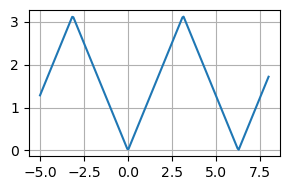

In [2]:
def f(t):
    if abs(t)>np.pi: 
        return f(abs(t)-2*np.pi)
    if (t>0)&(t<np.pi): 
        return t
    if (t<0)&(t>-np.pi): 
        return -t
t = np.linspace(-5,8,200)

plt.plot(t,[f(ti) for ti in t])
plt.tight_layout()
plt.grid()

o módulo `signal` da biblioteca SciPy possui uma função para produzir uma onda "dente de serra". Tente usar a `sawtooth`como é mostrado abaixo (para saber mais, veja [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html)).

In [3]:
from scipy import signal
tri = signal.sawtooth(t, width=0.5)
#plt.plot(t,tri)
#plt.tight_layout()
#plt.grid()

**Exercício 1:**
Com base no exemplo acima, defina a função representada abaixo e plote seu gráfico 
(note que essa função **não** é simétrica em relação ao eixo $y$).


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/onda_dente_de_serra.png" width="280">

In [4]:
# solução
#def h(x):
#    if x>3: 
#        return h(x-3)
#    if x<0: 
#        return h(x+3)
#    if (x>0)&(x<3): 
#        return x
#x = np.linspace(-4.5,4.5,200)
#plt.plot(x,[h(xi) for xi in x])
#plt.tight_layout()
#plt.grid()

A figura do exercício 1 pode ser uma representação para a função

$$f(t)=t, \quad 0\leq t< 3 \quad\text{e}\quad f(t+3)=f(t).$$

Uma representação mais precisa, considerando os intervalos com os extremos abertos e fechados, é mostrada no gráfico abaixo para $-3\leq x \leq 6$.



<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/periodica.png" width="480">

In [5]:
# código para a figura
#T = 3; g = lambda x: np.mod(x, 9); I = np.linspace(-3,3)
#fig, ax = plt.subplots(figsize=(6,2))
#for n in np.unique(np.floor(I/T)):
#    x = np.linspace(0,T)
#    #x = np.linspace(-4.5,4.5,200)
#    ax.plot(x[0:-1]-n*T,[g(xi) for xi in x[0:-1]], 'b')
#    ax.plot(x[0]-n*T, g(x[0]),marker='o',color='blue',fillstyle='full')
#    ax.plot(x[-1]-n*T, g(x[-1]),marker='o',color='blue',fillstyle='none')
#plt.grid()

**Exercício 2:** Tente encontrar uma função para reproduzir o gráfico dado abaixo, construído a partir de uma parábola.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/parabola_periodica.png" width="400">


In [6]:
# solução
#def f(x):
#    if x>1: 
#        return f(x-1.5)
#    if x<-0.5:
#        return f(x+1.5)
#    if (x>-0.5)&(x<1): 
#        return x**2
#x = np.linspace(-3,3,200)
#fig, ax = plt.subplots(figsize=(6,2))
#plt.plot(x,[f(xi) for xi in x])
#plt.grid()

Considere agora as funções mostradas abaixo

$$f_1(t)= A_1 \,cos(\omega_1 t + \phi_1) \quad \text{e} \quad f_2(t)= A_2 \,sen(\omega_2 t + \phi_2)$$

Estas são funções periódicas de período $T = \frac{2\pi}{\omega}$ em que $\phi_1$ e $\phi_2$ são os ângulos de fases, $A_1$ e $A_2$ são as amplitudes, e $\omega_1$ e $\omega_1$ frequência angulares. Essas funções são periódicas de período $T_1 = 2\pi/ \omega_1$ e $T_2 = 2\pi/ \omega_2$.

Podemos criar funções periódicas combinando duas ou mais funções periódicas cujos periodos são múltiplos inteiros. Vejamos alguns exemplos:   

**Exemplo 2:** Vamos criar um sinal combinando três senoides de frequências 1, 10, 20 Hz com amplitudes de 3, 1, e 0.5, respectivamente. Consideremos uma taxa de amostragem de 200 e a duração do sinal é de 2 segundos.

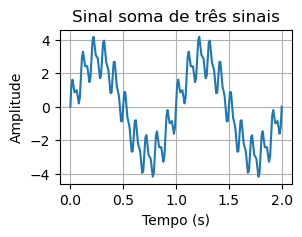

In [7]:
s = lambda A, w, t: A*np.sin(2*np.pi*w*t)

t = np.linspace(0,2,201)

plt.plot(t,s(3,1,t)+s(1,10,t)+s(0.5,20,t))

plt.xlabel( 'Tempo (s)' ) 
plt .ylabel( 'Amplitude' ) 
plt.title( 'Sinal soma de três sinais' ) 
plt.grid()
plt.show()

**Exercício 3:**

Gere um sinal formado por 3 ondas senoidais com frequências de 1 Hz, 4 Hz e 7 Hz, amplitudes 3, 1 e 0.5 e todos ângulos de fase iguais a zero. Use uma taxa de amostragem de 100 Hz (100 amostra no intervalo de tempo de 0 a 1). O resultado esperado é mostrado abaixo.


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/fig1_02.png" width="300">

In [8]:
# Solução
#sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)
#t = np.linspace(0,1,100)
#x = sinal(3,1,t)+sinal(1,4,t)+sinal(0.5,7,t)
#plt.plot(t,x)
#plt.xlabel( 'Tempo (s)' ) 
#plt .ylabel( 'Amplitude' ) 
#plt.title( 'Sinal soma de três sinais' ) 
#plt.grid()
#plt.show()

**Funções pares e funções ímpares**

Funções que satisfazem $f(-x) = f(x)$, isto é, cujo gráfico é simétrico em relação ao eixo $y$ são chamadas **funções pares**. 

Funções que satisfazem $f(-x) = -f(x)$ ou seja, são simétricas em relação à origem, são chamadas **funções ímpares**.


**Exercício 4:** Identiﬁque a paridade das seguintes funções.

a) $f(x) = sen(x)+0.5sen(3x)$

b) $f(x) = cos(x)+cos(2x)$

c) $f(x) = sen(x)+e^x$

In [9]:
# solução gráfica
#f = lambda x: np.sin(x)+0.5*np.sin(3*x)
#f = lambda x: np.sin(x)*(np.e**x)
#x = np.linspace(-5,5,200)
#plt.plot(x,f(x))
#plt.grid()

É possível demonstrar que toda função real pode ser escrita de forma única como a soma de uma função ímpar e outra par. Observe que a função cosseno é uma função par e a função seno é uma função ímpar, sssim, podemos representar funções como combinações de senos e cossenos.

Uma função par pode ser representada por uma série formada apenas por termos em cosseno, enquanto uma função ímpar pode ser representada por uma série formada apenas por termos em seno. Assim, para expandir uma função $f(x)$ em série de senos ou de cossenos, pode ser útil estendê-la a uma função periódica de período $2L$, escolhendo uma extensão par ou ímpar, conforme for mais conveniente. Essa construção recebe o nome de **expansão de meia-escala**, que corresponde a uma extensão periódica par ou ímpar, como ilustrado na figura a seguir.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/expansao_meia_onda.png" width="600">



Veja como são as expansões de meia-escala par de ímpar da onda triangular e suas representações por série de cossenos por série de senos, respectivamente (Kreyszig, 2016).

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/extensao_trianulo.png" width="600">


**Exemplo 3:** A seguir é mostrado um exemplo de como plotar algumas representações em somas parciais da série de cossenos para a expansões de meia-escala par da onda triangular. Fica como exercício realizar a expansão da série de senos.

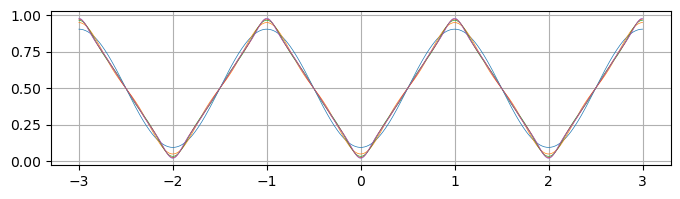

In [10]:
k = 1; L = 2
x = np.linspace(-1.5*L,1.5*L,500)

soma = np.zeros(len(x))
fig, ax = plt.subplots(figsize=(8,2))

for n in np.arange(2,20,4):
    soma = soma+(1/n**2)*np.cos(n*np.pi*x/L)
    f = np.full(len(x), k/2)-(16*k/np.pi**2)*soma
    plt.plot(x,f, lw=0.5)
    plt.grid()
plt.show()

As expansões em séries trigonométricas mostradas até aqui são exemplos da chamada série de Fourier, que será estudada em maiores detalhes a seguir.

**Funções periódicas de período 2$\pi$**

As funções $\cos nx$ e $\operatorname{sen}nx$, $n=0,1,2,...$, têm período $2\pi$ e constituem o chamado **sistema trigonométrico**. Assim, uma série trigonométrica na forma 
$$a_0+a_1 \cos x+b_1 \operatorname{sen} x+a_2 \cos 2 x+b_2 \operatorname{sen} 2 x+\cdots,$$
caso seja convergente, tem período $2\pi$.

Suponha que $f(x)$ seja uma função dada **de período 2**$\pi$, tal que possa ser representada por uma série trigonométrica tal que

$$f(x) = a_0+\sum_{n=1}^{\infty}\left(a_n \cos n x+b_n \operatorname{sen} n x\right)$$

Neste caso, tem-se a **série de Fourier** da função $f(x)$ e os coeficientes são dados pelas **fórmulas de Euler**:

$$a_0=\frac{1}{2 \pi} \int_{-\pi}^\pi f(x) dx, \quad a_n=\frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos nx dx \quad \text{e} \quad b_n=\frac{1}{\pi} \int_{-\pi}^\pi f(x) \operatorname{sen}nx dx$$

com $n=1,2,3,...$.

**Exemplo 4:** Encontre os coeficientes de Fourier da função periódica
$$
f(x)=\left\{\begin{array}{rcc}
-2 & \text { se } & -\pi<x<0 \\
2 & \text { se } & 0<x<\pi
\end{array} \quad \text { e } \quad f(x+2 \pi)=f(x) .\right.
$$

In [11]:
import sympy as sp
x, pi= sp.symbols('x pi')
n = sp.symbols('n', integer=True,positive=True)

In [12]:
a0 = (1/2*pi)*(sp.integrate(-2,(x,-pi,0))+sp.integrate(2,(x,0,pi)))
display(a0)

0

In [13]:
an = (1/pi)*(sp.integrate(-2*sp.cos(n*x),(x,-pi,0))+sp.integrate(2*sp.cos(n*x),(x,0,pi)))
display(an)

0

In [14]:
bn = (1/pi)*(sp.integrate(-2*sp.sin(n*x),(x,-pi,0))+sp.integrate(2*sp.sin(n*x),(x,0,pi)))
display(sp.simplify(bn))

4*(1 - cos(n*pi))/(n*pi)

In [15]:
bn = sp.simplify(bn.subs(pi,sp.pi))
bn

4*(1 - (-1)**n)/(pi*n)

Quando $n$ é par, $b_n=0$, quando $n$ é impar, $b_n=\frac{8}{n\pi}$. Assim a série de Fourier é dada por

$$
\frac{8}{\pi}\left(\operatorname{sen} x+\frac{1}{3} \operatorname{sen} 3 x+\frac{1}{5} \operatorname{sen} 5 x+\cdots\right).
$$

Podemos confirmar obtendo a série de Fourier usando o método `.fourier_series()` da biblioteca SymPy, como é mostrado a seguir

In [16]:
f = sp.Piecewise((-2, (x >= -sp.pi) & (x < 0)),
                 (2, (x >= 0) & (x < sp.pi)))
fs = sp.fourier_series(f, (x, -sp.pi, sp.pi))
fs

FourierSeries(Piecewise((-2, (x < 0) & (x >= -pi)), (2, (x >= 0) & (x < pi))), (x, -pi, pi), (0, SeqFormula(0, (_n, 1, oo)), SeqFormula(Piecewise((-4*cos(_n*pi)/_n + 4/_n, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*x)/pi, (_n, 1, oo))))

In [17]:
fs10= fs.truncate(10)   # 10 termos
f_lambd = sp.lambdify(x, fs10, "numpy")

xi = np.linspace(-2*np.pi, 2*np.pi, 400)
yi = f_lambd(xi)

In [18]:
# onda quadrada criada com scipy.signal
sqr = 2*signal.square(xi,duty=0.5)

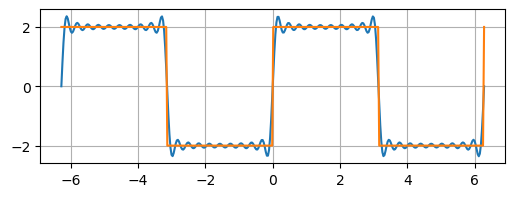

In [19]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(xi, yi)
plt.plot(xi, sqr)
plt.grid()
plt.show()

**Exercício 4:** Suponha que existe uma série de Fourier convergindo para a função $f$ definida por

$$
\begin{gathered}
f(x)=\left\{\begin{array}{cc}
-x, & -\pi \leq x<0 \\
x, & 0 \leq x<\pi
\end{array}\right. \\
\\
f(x+2\pi)=f(x)
\end{gathered}
$$


Obtenha os coeficientes da série de Fourier e faça o gráfico para diferentes somas parciais da série, junto com o gráfico da função.

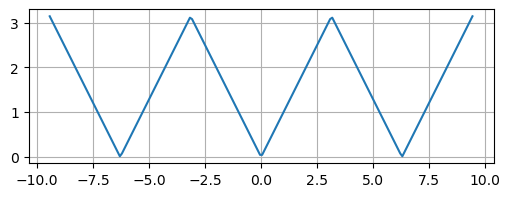

In [20]:
x = np.linspace(-3*np.pi,3*np.pi,200)
f = (np.pi/2)*signal.sawtooth(x,width=0.5)+(np.pi/2)

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,f)
plt.grid()

**Funções periódicas de período $T$**

Se $f$ e $g$ forem duas funções periódicas com período comum $T$, então seu produto $fg$ e qualquer combinação linear $c_1 f + c_2 g$ também serão periódicas com período $T$. Além disso, pode-se mostrar que a soma de qualquer número finito, ou até a soma de uma série infinita convergente, de funções de período $T$ também é periódica com período $T$. 

Em particular, as funções $\operatorname{sen}\left(\frac{n \pi x}{L}\right)$ e $\cos \left(\frac{n \pi x}{L}\right), n=1,2, \ldots$, são periódicas com período fundamental $T = \frac{2L}{n}$. Note também que, como todo múltiplo inteiro de um período também é um período, cada uma das funções tem o período comum $2L$. Estas funções formam um conjunto ortogonal no intervalo $-L \leq x \leq L$.  ([Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/166/2/2)).

Assim, se $f$ é uma função periódica de período $2L$, então $f$ pode ser escrita como combinação linear dessas funções, que é a a **série de Fourier da função $f(x)$ de período $2 L$**

$$
f(x)=a_0+\sum_{n=1}^{\infty} \Big[ a_n \cos \left(\frac{n \pi x}{L}\right)+b_n \operatorname{sen}\left(\frac{n \pi x}{L}\right)\Big]
$$


com os coeficientes de Fourier de $f(x)$ dados pelas **fórmulas de Euler**

$$a_0=\frac{1}{2 L} \int_{-L}^L f(x) d x, \quad a_n=\frac{1}{L} \int_{-L}^L f(x) \cos \frac{n \pi x}{L} d x \quad \text{e} \quad b_n=\frac{1}{L} \int_{-L}^L f(x) \operatorname{sen} \frac{n \pi x}{L} d x
$$

com $n=1,2,3,\dots.$

**Exemplo 5:** Suponha que existe uma série de Fourier convergindo para a função $f$ definida por

$$
\begin{gathered}
f(x)=\left\{\begin{array}{cc}
-x, & -2 \leq x<0 \\
x, & 0 \leq x<2
\end{array}\right. \\
f(x+4)=f(x)
\end{gathered}
$$


Vamos ver como são os coeficientes nesta série de Fourier e fazer o gráfico.

In [21]:
def f(x):
    if x>=2: 
        return f(x-4)
    if x<-2:
        return f(x+4)
    if (x>=-2)&(x<0): 
        return -x
    if (x>=0)&(x<2): 
        return x

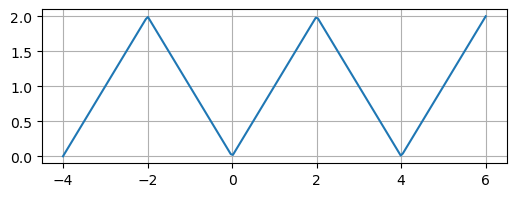

In [22]:
x = np.linspace(-4,6,200)
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

Os coeficientes são dados por 

$$
a_0=\frac{1}{2} \int_{-2}^0(-x) d x+\frac{1}{2} \int_0^2 x d x = 2
$$

$$
a_n=\frac{1}{2} \int_{-2}^0(-x) cos \left(\frac{n \pi x}{2}\right) d x+\frac{1}{2} \int_0^2 x cos \left(\frac{n \pi x}{2}\right) dx
$$

$$
=\left\{\begin{array}{cl}
-\frac{8}{(n \pi)^2}, & n \text { ímpar } \\
0, & n \text { par. }
\end{array}\right.
$$

e 

$$
b_n=\frac{1}{2} \int_{-2}^0(-x) sen \left(\frac{n \pi x}{2}\right) dx+\frac{1}{2} \int_0^2 xsen \left(\frac{n \pi x}{2}\right)dx=0
$$

As integrais podem ser obtidas usando Sympy, com a função `integrate`, por exemplo:

In [23]:
x, pi = sp.symbols('x pi')
n = sp.symbols('n', integer=True, positive=True)
sp.integrate(-x*sp.cos(n*pi*x/2), (x,-2,0))

Piecewise((4*sin(n*pi)/(n*pi) + 4*cos(n*pi)/(n**2*pi**2) - 4/(n**2*pi**2), (pi > -oo) & (pi < oo) & Ne(pi, 0)), (2, True))

Calculando as integrais, substituindo e simplificando, obtemos 
$$
f(x)=1-\frac{8}{\pi^2} \sum_{n=1}^{\infty} \frac{1}{(2 n-1)^2} \cos \left(\frac{(2 n-1) \pi x}{2}\right) .
$$

O gráfico da função e da série de fourier para 5 termos é mostrado abaixo:

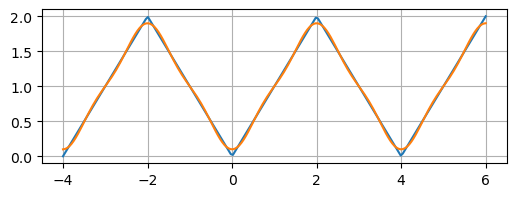

In [24]:
x = np.linspace(-4,6,200)
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,[f(xi) for xi in x])

soma = np.zeros(len(x))
for n in range(1,3):
    soma= soma+(1/(2*n-1)**2)*np.cos((2*n-1)*np.pi*x/2)

serie = 1-(8/np.pi**2)*soma
plt.plot(x,serie)
plt.grid()

**Exemplo 6:** Modelando uma onda quadrada de período $T=2$ e amplitude $A=1$; obtendo a série de fourier com 5 termos e plotando a curva, a série e a suas componentes harmônicas. 

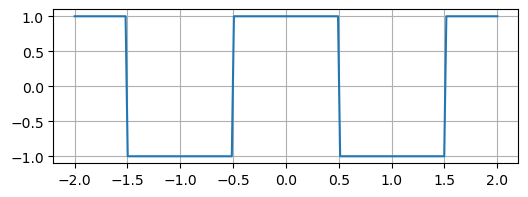

In [25]:
T = 2.0

def f(x):
    if abs(x)>T/2: 
        return f(abs(x)-T)
    if (x>-T/4)and(x<T/4): 
        return 1
    if (x<-T/4)or(x>T/4): 
        return -1
    
x = np.linspace(-T,T,200)

plt.figure(figsize = (6, 2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

A onda quadrada par é aproximada pela série de Fourier com coeficientes $a_0=0$, $bn=0$ e 

$$
a_k=\left\{\begin{array}{cl}
4 /(k \pi) & \text { para } k=1,5,9, \ldots \\
-4 /(k \pi) & \text { para } k=3,7,11, \ldots \\
0 & \text { para } k=\text { inteiros pares }
\end{array}\right.
$$

O código abaixo pode ser usado para gerar alguns termos da série.

In [26]:
import sympy as sp
t, w_0 = sp.symbols('t, w_0')
serie = 0

for n in range(1,10,2):
    serie += (-1)**(n//2)*(4/sp.pi)*sp.cos(n*w_0*t)/n
serie

4*cos(t*w_0)/pi - 4*cos(3*t*w_0)/(3*pi) + 4*cos(5*t*w_0)/(5*pi) - 4*cos(7*t*w_0)/(7*pi) + 4*cos(9*t*w_0)/(9*pi)

In [27]:
s = sp.lambdify(t, serie) 

O código abaixo plota os gráficos da onda quadrada, a aproximação pos série de Fourier e as componentes harmônicas da onda (termos da série). 

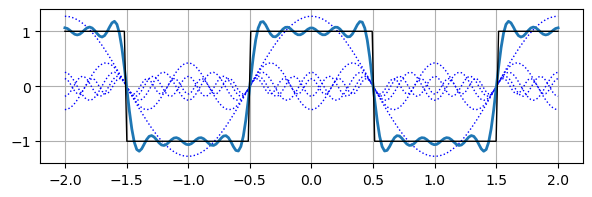

In [28]:
ti = np.linspace(-T,T,200)
soma=0
w = 2*np.pi/T

plt.figure(figsize = (7, 2))
for n in range(1,10,2):
    comp = (-1)**(n//2)*(4/np.pi)*np.cos(n*w*ti)/n
    soma += comp
    plt.plot(ti, comp, 'b:',lw=1)

plt.plot(ti, soma, lw=2)
plt.plot(x,[f(xi) for xi in x], 'k', lw=1.0)
plt.grid()
plt.show()

Assim, podemos descrever uma função periódica por uma série de senos ou de cossenos em que são conhecidas as frequências e as amplitudes de cada termo, além do ângulo de fase ($\theta$).

No exemplo acima, para as amplitudes $4/\pi, -4/3\pi, 4/5\pi, -4/7\pi,...$, tem-se as frequências $f_0, 3f_0, 5f_0, 7f_0,...$. A figura abaixo mostra as linhas espectrais de amplitude e fase para a onda quadrada do exemplo anterior. Esta é uma forma de representar a função em termos de ampliude, frequência e fase (Fonte: [Chapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/491)).

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/linha_espectral_e_fase.png?raw=true" width="600">

**Exercício 5:** Use os exemplos anteriores como modelos para fazer o gráfico da função 

$$
f(x)=\left\{\begin{array}{cc}
0, & -3<x<-1 \\
1, & -1<x<1 \\
0, & 1<x<3
\end{array}\right.
$$

supondo que $f(x + 6) = f(x)$. 

Sabendo que a série de Fourier é dada por 

$$
f(x)=\frac{1}{3}+\sum_{n=1}^{\infty} \frac{2}{n \pi} \operatorname{sen}\left(\frac{n \pi}{3}\right) \cos \left(\frac{n \pi x}{3}\right)
$$

**Exemplo 7:** Vamos obter a série de Fourier para a função

$$
f(x)=
\begin{cases}
x^2 & \text{ para } 0 \leq x \leq 1 \\ 
\frac{x}{2}+\frac{1}{2} & \text { para } 1 \leq x \leq 2
\end{cases}
$$

com $f(x)=f(x+2)$.

FourierSeries(Piecewise((x**2, (x >= 0) & (x < 1)), (x/2 + 1/2, (x >= 1) & (x < 2))), (x, 0, 2), (19/24, SeqFormula(Piecewise((3*sin(2*_n*pi)/(2*_n*pi) + 3*cos(_n*pi)/(2*_n**2*pi**2) + cos(2*_n*pi)/(2*_n**2*pi**2) - 2*sin(_n*pi)/(_n**3*pi**3), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (19/12, True))*cos(_n*pi*x), (_n, 1, oo)), SeqFormula(Piecewise((-3*cos(2*_n*pi)/(2*_n*pi) + 3*sin(_n*pi)/(2*_n**2*pi**2) + sin(2*_n*pi)/(2*_n**2*pi**2) + 2*cos(_n*pi)/(_n**3*pi**3) - 2/(_n**3*pi**3), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*pi*x), (_n, 1, oo))))

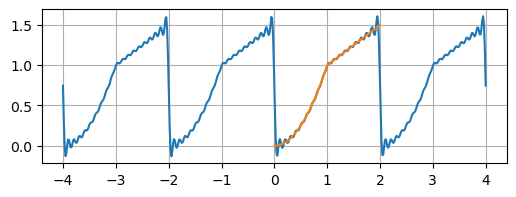

In [42]:
x = sp.symbols('x')
f = sp.Piecewise((x**2, (x >= 0) & (x < 1)),
                 ((x+1)/2, (x >= 1) & (x < 2)))
fs = sp.fourier_series(f, (x, 0, 2))
display(fs)

f_lamb = sp.lambdify(x,fs.truncate(20))

xi = np.linspace(-4,4,500)
yi =  sp.lambdify(x,f)(xi)

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(xi, f_lamb(xi), xi, yi)
plt.grid()
plt.show()

**Exemplo 8:**
A seguir é mostrado como usar **integração numérica** para obter uma aproximação por série de Fourier da função do primeiro exemplo. Modifique o código dado para aproximar a função da criada no Exercício 1 deste texto. 

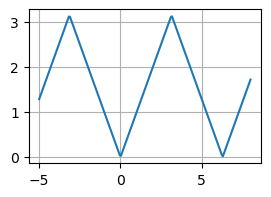

In [30]:
def f(x):
    if abs(x)>np.pi: 
        return f(abs(x)-2*np.pi)
    if (x>0)&(x<np.pi): 
        return x
    if (x<0)&(x>-np.pi): 
        return -x
    
x = np.linspace(-5,8,200)
plt.plot(x,[f(xi) for xi in x])
plt.grid()

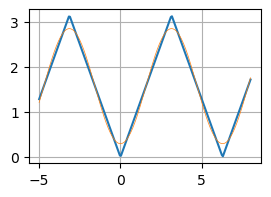

In [31]:
from scipy.integrate import quad

s = np.pi/2 

for n in range(1,3):
    An = (1/np.pi)*(quad(lambda x: -x*np.cos(n*x),-np.pi,0)[0] +\
                    quad(lambda x: x*np.cos(n*x), 0,np.pi)[0])
    Bn = (1/np.pi)*(quad(lambda x: -x*np.sin(n*x),-np.pi,0)[0] +\
                    quad(lambda x: x*np.sin(n*x), 0,np.pi)[0])
    s += An*np.cos(n*x) + Bn*np.sin(n*x)
plt.plot(x,[f(xi) for xi in x])
plt.plot(x,s, lw=0.5)
plt.grid()

**Exemplo 9:** Use integração numérica para obter uma aproximação por série de Fourier da função $f(x)=sen(e^x)$ no intervalo $(-3,3)$. Plote o gráfico da função $f$ e da função aproximadora com 10 termos.

In [32]:
f = lambda x: np.sin(np.exp(x))

In [33]:
def fourier(f,N):
    n=0
    A0 = 1/np.pi * quad(lambda x: f(x)*np.cos(n*x),-np.pi,np.pi)[0]
    
    xi = np.linspace(-3,3,301)
    yi = []

    soma = A0/2

    for x in xi:
        soma = A0/2
        for n in range(1,N):
            An = 1/np.pi * quad(lambda x: f(x)*np.cos(n*x),-np.pi,np.pi)[0]
            Bn = 1/np.pi * quad(lambda x: f(x)*np.sin(n*x),-np.pi,np.pi)[0]
            soma +=  An*np.cos(n*x)+Bn*np.sin(n*x)
        yi.append(soma)
        
    plt.plot(xi,yi, xi, f(xi))
    plt.grid()

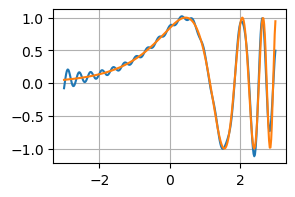

In [34]:
fourier(f,20)

### Referências

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. 

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. 7. ed. Porto Alegre: AMGH, 2016. E-book. p.481. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/. Acesso em: 21 ago. 2025.

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1

KREYSIG, E. Matemática superior para engenharia (9ª ed.). Rio de Janeiro: LTC. 2016.

LANGTANGEN, Hans Pette. A Primer on Scientific Programming with Python. Texts in Computational Science and Engineering. Springer Berlin, Heidelberg, ed 5, 2016. DOI: https://doi.org/10.1007/978-3-662-49887-3
